In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.cluster import KMeans

In [68]:
iris = pd.read_csv(r'C:/Users/eunjin/Desktop/project/Iris.csv', index_col=0)
iris.head()
iris.isnull().any()
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Petal')

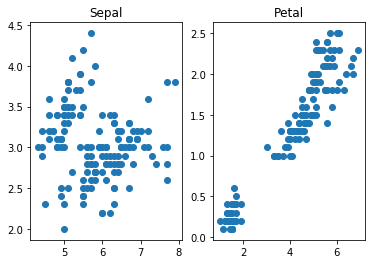

In [8]:
plt.subplot(1,2,1)
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'])
plt.title('Petal')

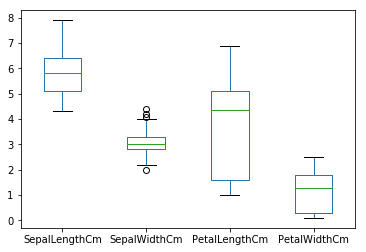

In [20]:
iris.plot(kind='box')

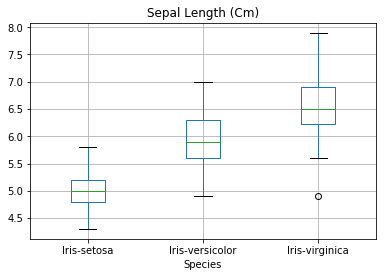

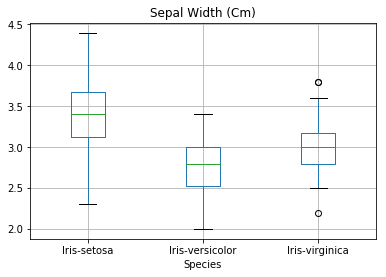

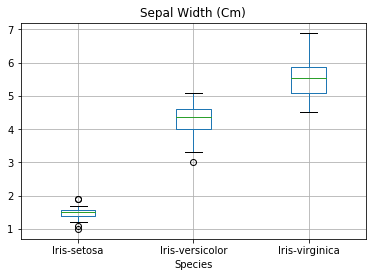

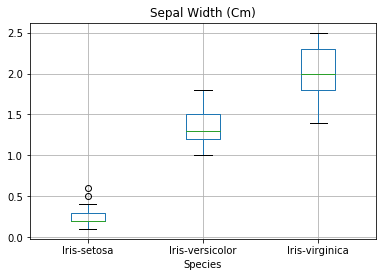

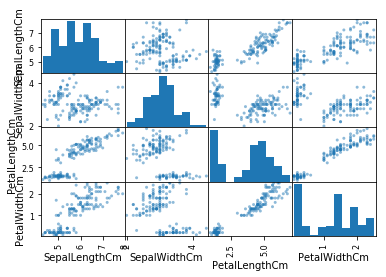

In [53]:
iris.boxplot(by='Species', column='SepalLengthCm')
plt.title('Sepal Length (Cm)')
plt.suptitle("")

iris.boxplot(by='Species', column='SepalWidthCm')
plt.title('Sepal Width (Cm)')
plt.suptitle("")
plt.show()

iris.boxplot(by='Species', column='PetalLengthCm')
plt.title('Sepal Width (Cm)')
plt.suptitle("")
plt.show()

iris.boxplot(by='Species', column='PetalWidthCm')
plt.title('Sepal Width (Cm)')
plt.suptitle("")
plt.show()

pm = pd.plotting.scatter_matrix(iris.loc[:, 'SepalLengthCm':'PetalWidthCm'])

In [32]:
st = iris.loc[iris['Species'] == 'Iris-setosa', 'SepalLengthCm':'PetalWidthCm']
st.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [33]:
vr = iris.loc[iris['Species'] == 'Iris-versicolor', 'SepalLengthCm':'PetalWidthCm'] 
vr.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
51,7.0,3.2,4.7,1.4
52,6.4,3.2,4.5,1.5
53,6.9,3.1,4.9,1.5
54,5.5,2.3,4.0,1.3
55,6.5,2.8,4.6,1.5


In [34]:
vi = iris.loc[iris['Species'] == 'Iris-virginica', 'SepalLengthCm':'PetalWidthCm']
vi.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
101,6.3,3.3,6.0,2.5
102,5.8,2.7,5.1,1.9
103,7.1,3.0,5.9,2.1
104,6.3,2.9,5.6,1.8
105,6.5,3.0,5.8,2.2


(array([ 1.,  0.,  5.,  5.,  8.,  9., 10.,  5.,  1.,  6.]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <a list of 10 Patch objects>)

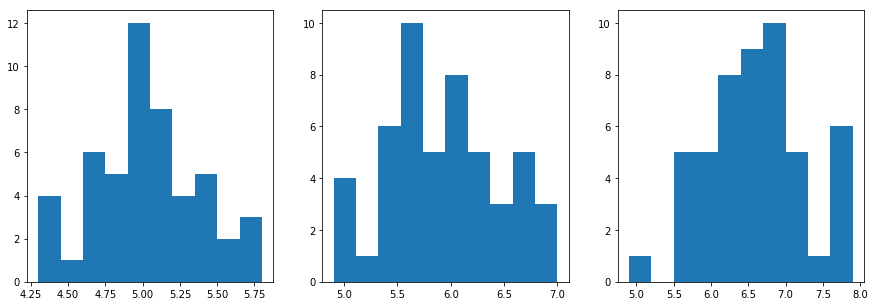

In [45]:
# testing anova assumptions

f2 = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(st.SepalLengthCm)
plt.subplot(1,3,2)
plt.hist(vr.SepalLengthCm)
plt.subplot(1,3,3)
plt.hist(vi.SepalLengthCm)

In [62]:
stats.shapiro(st), stats.shapiro(vr), stats.shapiro(vi)

((0.89885413646698, 2.125612325043491e-10),
 (0.9393146634101868, 1.9985320420801145e-07),
 (0.9007613658905029, 2.8103852578453825e-10))

In [63]:
stats.levene(st.SepalLengthCm, vr.SepalLengthCm, vi.SepalLengthCm)

LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

In [64]:
# anova test

aov = ols('SepalLengthCm ~ C(Species)', data = iris).fit()
print(aov.summary())
sm.stats.anova_lm(aov, typ=2)

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 06 May 2019   Prob (F-statistic):           1.67e-31
Time:                        23:54:55   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

,sum_sq,df,F,PR(>F)
C(Species),63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


In [97]:
# all kmeans clustering

iris2 = iris.drop('Species',1)
iris2 = iris2.to_numpy()

km = KMeans(n_clusters=3)
km.fit(iris2)
km.predict(iris2)
labels = km.labels_

center = km.cluster_centers_
print(center)

from sklearn import datasets
targets = datasets.load_iris().target

[[5.006      3.418      1.464      0.244      0.         2.        ]
 [5.9016129  2.7483871  4.39354839 1.43387097 0.         2.        ]
 [6.85       3.07368421 5.74210526 2.07105263 0.         2.        ]]


Text(0, 0.5, 'Sepal Width')

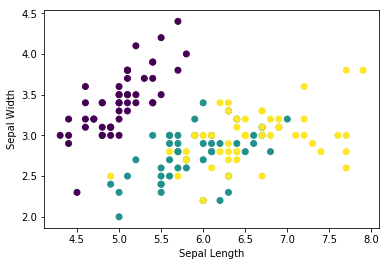

In [98]:
sepal = iris2[:,:-2]
sep_target = targets
plt.scatter(sepal[:,0], sepal[:,1], c = sep_target)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [87]:
skm = KMeans(n_clusters=3)
skm.fit(sepal)
skm.predict(sepal)
sep_labels = skm.labels_
sep_center = skm.cluster_centers_
print(sep_center)

[[6.81276596 3.07446809]
 [5.006      3.418     ]
 [5.77358491 2.69245283]]


Text(0, 0.5, 'Petal Width')

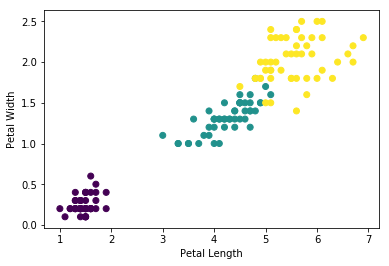

In [100]:
# petal kmeans clustering

petal = iris2[:,2:]
petal_target = targets
plt.scatter(petal[:,0], petal[:,1], c = petal_target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [84]:
pkm = KMeans(n_clusters=3)
pkm.fit(petal)
pkm.predict(petal)
petal_labels = pkm.labels_
petal_center = pkm.cluster_centers_
print(petal_center)

[[5.59583333 2.0375    ]
 [1.464      0.244     ]
 [4.26923077 1.34230769]]
